# <font color = 'orange'> Hierarchical Clustering - Agglomerative

---

### <font color = 'Blue'> Import Library, load Dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

dataset = load_iris()

dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

---

### <font color = 'Blue'> 1. Getting independent values

In [3]:
x = pd.DataFrame(dataset['data'])

x.columns = dataset['feature_names']

x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### <font color = '#AA00FF'> Observation :
* All independent features now we have to find the clusters for this data.

---

### <font color = 'Blue'> 2. Standardization

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
x_scaled = scaler.fit_transform(x)

In [6]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [7]:
x_scaled.shape

(150, 4)

### <font color = '#AA00FF'> Observation :
* We have 4 features so we cannot see 4d so we convert into 2d and then visualize.

---

### <font color = 'Blue'> 3. Apply PCA - for dimensionality reduction

In [8]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components = 2)

In [10]:
pca_scaled = pca.fit_transform(x_scaled)

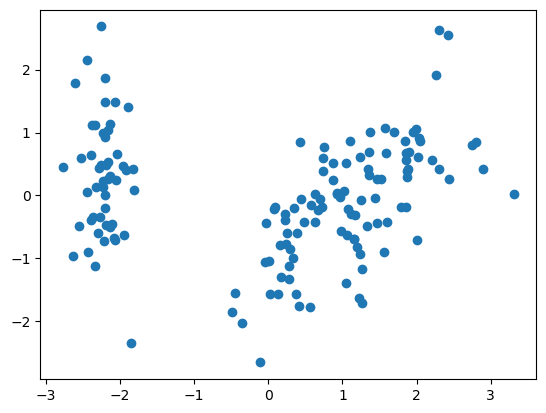

In [11]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1])

### For understand let's use target-output as color parameter 

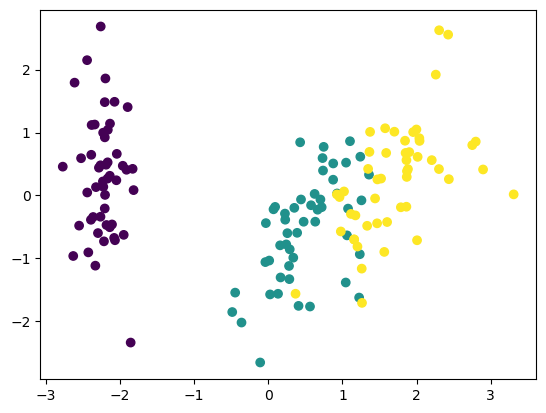

In [12]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c = dataset['target'])

---

### <font color = 'Blue'> 4. Create a Dendogram - to find the K Value

Text(0, 0.5, 'Eucledian Distance')

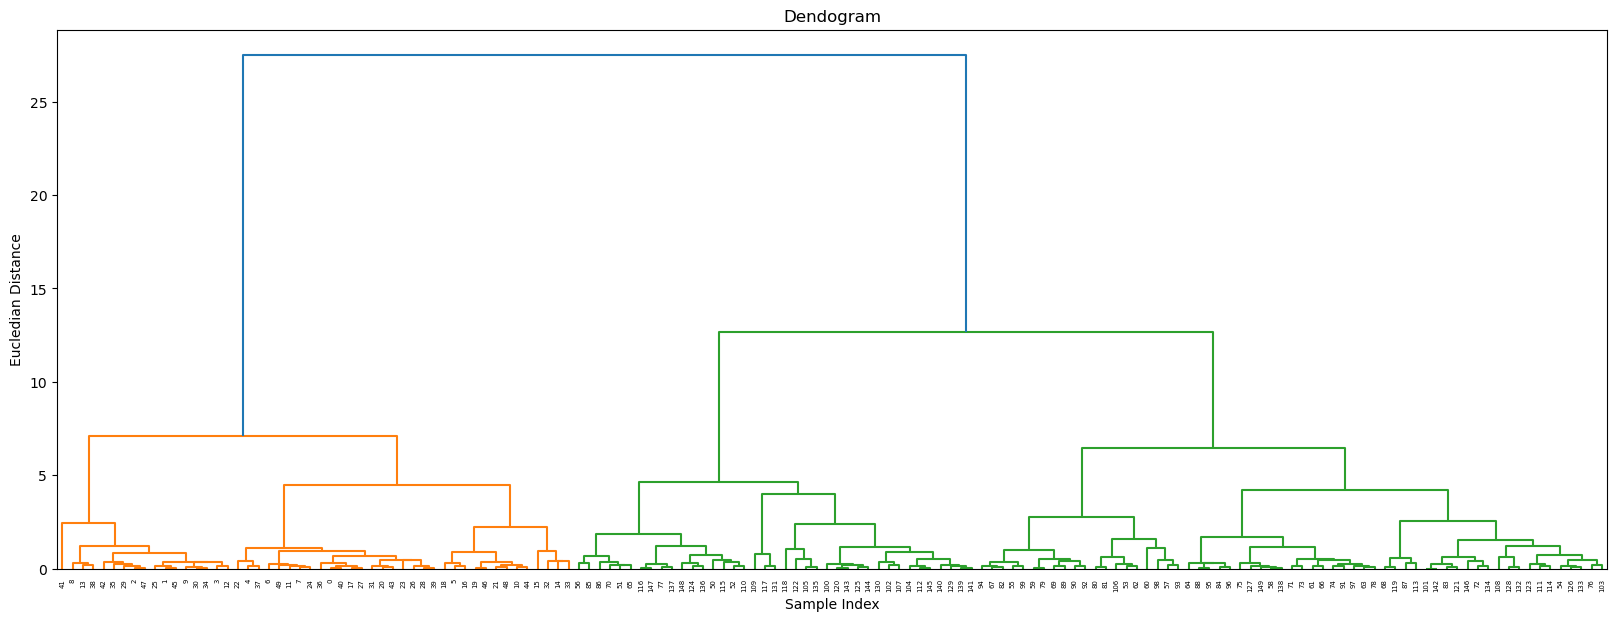

In [13]:
import scipy.cluster.hierarchy as sc

plt.figure(figsize = (20,7))

# creating dendogram - here ward is fixed
sc.dendrogram(sc.linkage(pca_scaled, method = 'ward'))

plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')

### <font color = '#AA00FF'> Observation :
* We can notice that longest vertical line i.e right blue line passes through only 2 points so we have 2 clusters.

---

### <font color = 'Blue'> 5. Agglomerative Clustering

In [14]:
from sklearn.cluster import AgglomerativeClustering

# n_clusters i.e k value is found using dendogram
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [15]:
# this are my cluster groups
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

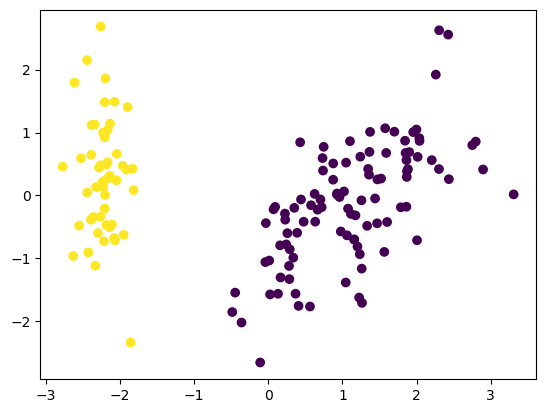

In [16]:
# color parameter is the cluster group
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c = cluster.labels_)

---

### <font color = 'Blue'> 6. Performance Metrics - Silhouette Score to validate the k values

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette_coefficient = []

for k in range (2,11):
    agglo = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
    agglo.fit(pca_scaled)
    # really data and clusters groups to validate of k values
    score = silhouette_score(x_scaled, agglo.labels_)
    silhouette_coefficient.append(score)
    
silhouette_coefficient

[0.5817500491982808,
 0.4616040278776406,
 0.3882398637789614,
 0.32903317050878156,
 0.29097449226064215,
 0.2841481134837051,
 0.2887228877045146,
 0.30644773132216896,
 0.28485890597163643]

### <font color = '#AA00FF'> Observation :
* We can notice that for k = 2 we have good silhouette score. let's visualize.

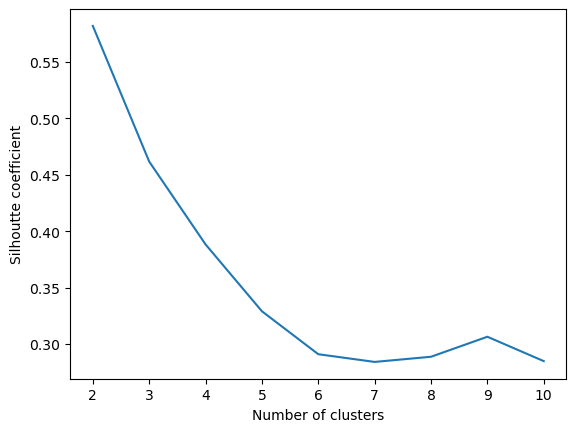

In [19]:
# visulaization

plt.plot(range(2,11), silhouette_coefficient)

plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte coefficient')
plt.show()

---